# SVM

No SVM pegamos os pontos mais proximos entre si de classe diferentes e vamos criar um limite de separação e depois com isso conseguir classificar um novo ponto.

Teremos uma margem entre cada classe e quanto maior a margem melhor

Documentação: 
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

In [20]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True, as_frame=True)

In [22]:
## Considera so as colunas de pelatas com valores 0 e 1
X = X.loc[y.isin([0, 1]), ['petal length (cm)', 'petal width (cm)']]
y = y[y.isin([0,1])]

In [3]:
## Separa em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

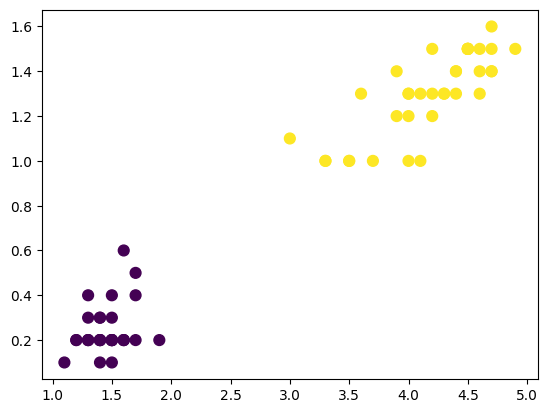

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

plt.show() 

In [5]:
from sklearn.svm import SVC

In [6]:
clf = SVC(kernel='linear').fit(X_train, y_train)

In [7]:
clf.coef_

array([[1.1769056 , 0.78337144]])

In [8]:
w1 = clf.coef_[0][0]
w2 = clf.coef_[0][1]

In [9]:
w0 = clf.intercept_[0]

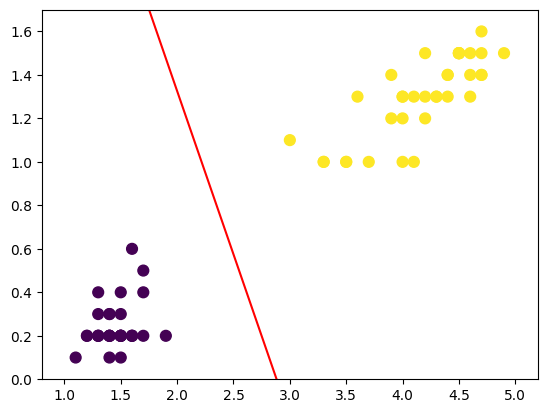

In [10]:
## Mostrando a reta
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x, y, color='red')

ax.set(ylim=(0, 1.7))

plt.show()

In [11]:
## Sabendo os vetores de suporte que trancou a reta
clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

In [12]:
## Pegando os valores de x
clf.support_vectors_[:,0]

array([1.9, 1.7, 3. ])

In [13]:
## Pegando os valores de y
clf.support_vectors_[:,1]

array([0.2, 0.5, 1.1])

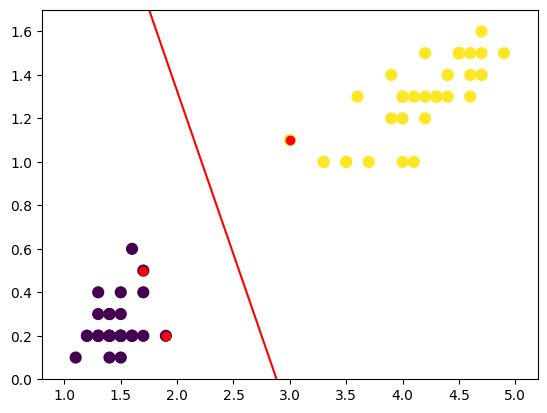

In [14]:
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x, y, color='red')

ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    color='red'
)

ax.set(ylim=(0, 1.7))

plt.show()

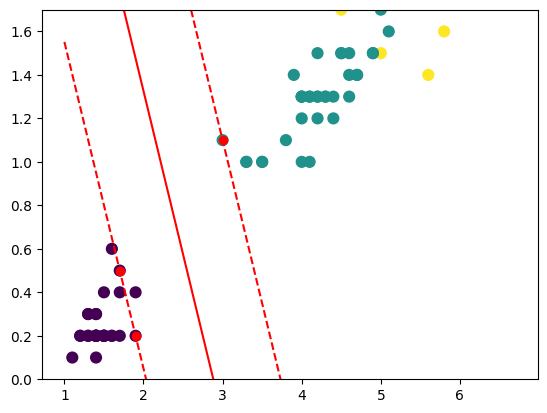

In [23]:
## Vendo as margens
fig, ax = plt.subplots()

ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=y_train, s=60)

x = np.linspace(1,5,100)
y = (-w1*x-w0)/w2
ax.plot(x, y, color='red')
y2 = (+1-w1*x-w0)/w2
ax.plot(x, y2, '--r')
y3 = (-1-w1*x-w0)/w2
ax.plot(x, y3, '--r')

ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    color='red'
)

ax.set(ylim=(0, 1.7))

plt.show()

In [24]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [25]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
clf2 = SVC().fit(X_train, y_train)

In [27]:
y_pred = clf2.predict(x_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

1.0
